/tmp/ipykernel_601820/1624709443.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  category_colors = {cat: cm.get_cmap("tab10")(i / len(unique_categories)) for i, cat in enumerate(unique_categories)}


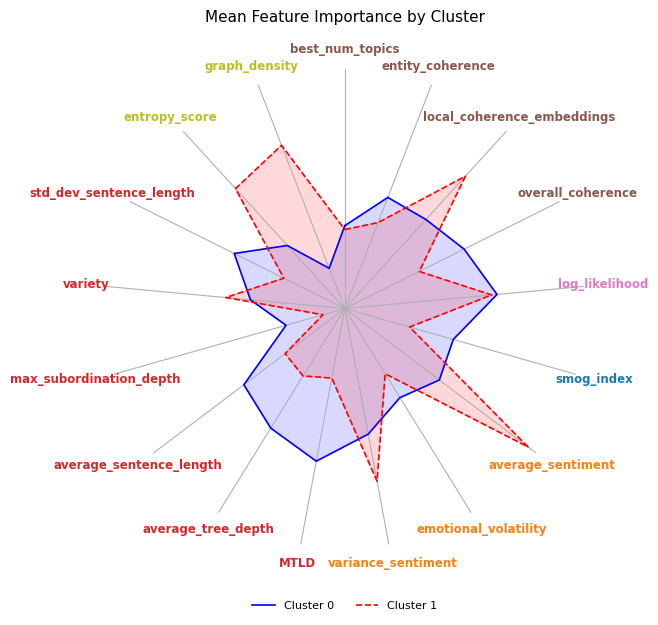

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Leer el CSV (ignorando comentarios que comiencen con "//")
df = pd.read_csv("outputs/reader_cluster_means.csv", comment='/')

# Obtener la lista de columnas originales (excluyendo "Cluster")
orig_cols = list(df.columns[1:])

# Extraer nombres cortos y categorías
categories = [col.split('.')[0] for col in orig_cols]  # Extraemos la categoría
short_features = [col.split('.')[-1] for col in orig_cols]  # Extraemos el nombre corto

# Intercambiar MTLD y average_sentence_length para evitar solapamiento
if "MTLD" in short_features and "average_sentence_length" in short_features:
    idx_avg = short_features.index("average_sentence_length")
    idx_mtld = short_features.index("MTLD")

    # Intercambiamos posiciones en todas las listas
    short_features[idx_avg], short_features[idx_mtld] = short_features[idx_mtld], short_features[idx_avg]
    orig_cols[idx_avg], orig_cols[idx_mtld] = orig_cols[idx_mtld], orig_cols[idx_avg]
    categories[idx_avg], categories[idx_mtld] = categories[idx_mtld], categories[idx_avg]

features = short_features
num_vars = len(features)

# Reordenamos el dataframe
df_reordered = df[["Cluster"] + orig_cols]

# Calcular los ángulos
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Asignar colores a cada categoría
unique_categories = list(set(categories))
category_colors = {cat: cm.get_cmap("tab10")(i / len(unique_categories)) for i, cat in enumerate(unique_categories)}

# Configurar la figura con el tamaño forzado
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw=dict(polar=True))
fig.set_size_inches(6, 7, forward=True)


# Colores para cada cluster
colors = ['b', 'r', 'g', 'm', 'y']
line_styles = ['-', '--', '-.', ':', '-']  # Diferentes estilos de línea para mejor visibilidad

# Dibujar una línea para cada cluster
for i, row in df_reordered.iterrows():
    values = row[1:].tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], linewidth=1.2, label=f"Cluster {int(row['Cluster'])}")
    ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.15)  # Menos opacidad para evitar sobrecarga visual

# Ajustes de las etiquetas
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Etiquetas de ejes coloreadas por categoría y en negrita, mejor alineadas
xtick_labels = plt.xticks(angles[:-1], features, size=8.5, ha='center', rotation=25, fontweight='bold', rotation_mode="anchor", verticalalignment='center')[1]


for label, category in zip(xtick_labels, categories):
    label.set_color(category_colors[category])  # Colorear la etiqueta según su categoría

ax.set_rlabel_position(0)
plt.yticks([], [])  # Oculta etiquetas de radio
ax.spines['polar'].set_visible(False)  # Elimina borde exterior

# Título más compacto
plt.title("Mean Feature Importance by Cluster", fontsize=11, y=1.08)

# Ubicación de la leyenda de clusters
legend2 = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize=8, ncol=2, frameon=False)

# Ajustes finales
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Ajustar manualmente los márgenes si es necesario
plt.savefig("figures/readers_clusters/feature_means_radar_chart.pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
